## Resources: 
1. https://altair-viz.github.io/gallery/index.html
2. http://vallandingham.me/altair_intro.html

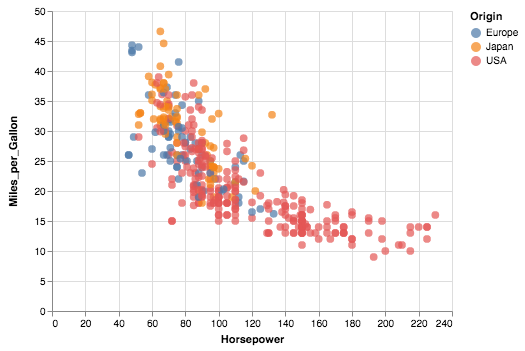

In [1]:
# Scatter Plot
import altair as alt
from vega_datasets import data

cars = data.cars()

alt.Chart(cars).mark_circle(size=60).encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color='Origin',
    tooltip=['Name', 'Origin', 'Horsepower', 'Miles_per_Gallon']
).interactive()

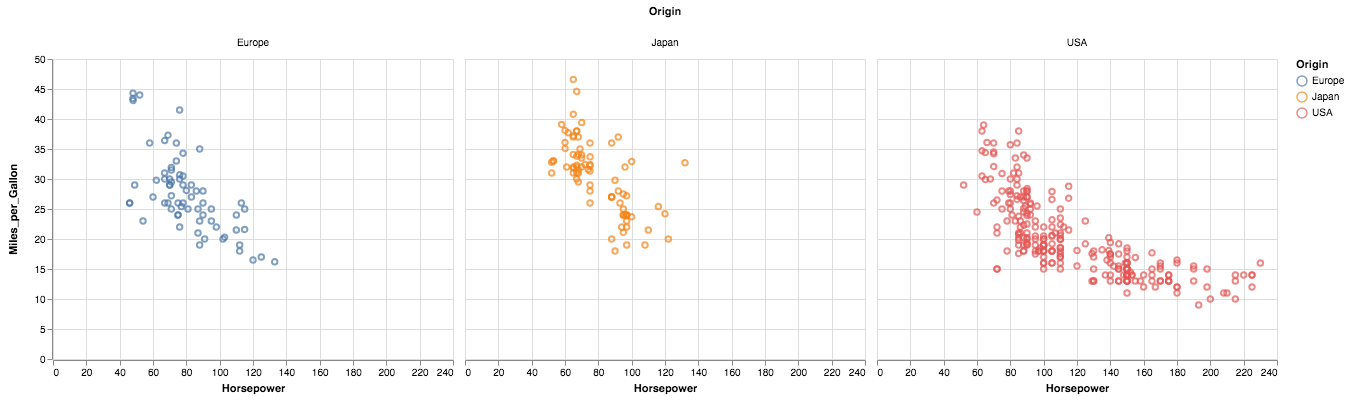

In [65]:
brush = alt.selection_interval()

alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color=alt.condition(brush, 'Origin', alt.value('lightgray')),
).properties(
    selection=brush
).facet(column='Origin:N')

In [2]:
cars.sample(3)

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
253          19.4          4          78.0        52.0              32.8   
99           13.0          8         351.0       158.0              13.0   
98           12.0          8         400.0       150.0              13.0   

                          Name Origin  Weight_in_lbs       Year  
253           mazda glc deluxe  Japan           1985 1978-01-01  
99                    ford ltd    USA           4363 1973-01-01  
98   chevrolet caprice classic    USA           4464 1973-01-01

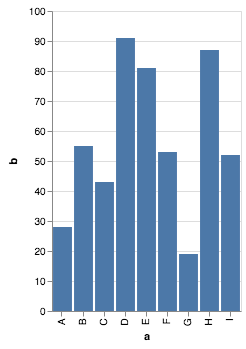

In [3]:
# Bar Chart
import altair as alt
import pandas as pd

data = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'b': [28, 55, 43, 91, 81, 53, 19, 87, 52]
})

alt.Chart(data).mark_bar().encode(
    x='a',
    y='b'
)

In [4]:
data.sample(3)

a   b
6  G  19
7  H  87
8  I  52

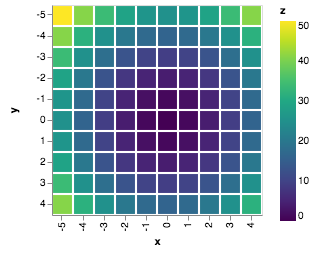

In [5]:
# Heatmap
import altair as alt
import numpy as np
import pandas as pd

# Compute x^2 + y^2 across a 2D grid
x, y = np.meshgrid(range(-5, 5), range(-5, 5))
z = x ** 2 + y ** 2

# Convert this grid to columnar data expected by Altair
data = pd.DataFrame({'x': x.ravel(),
                     'y': y.ravel(),
                     'z': z.ravel()})

alt.Chart(data).mark_rect().encode(
    x='x:O',
    y='y:O',
    color='z:Q'
)

In [6]:
data.sample(3)

x  y   z
30 -5 -2  29
87  2  3  13
36  1 -2   5

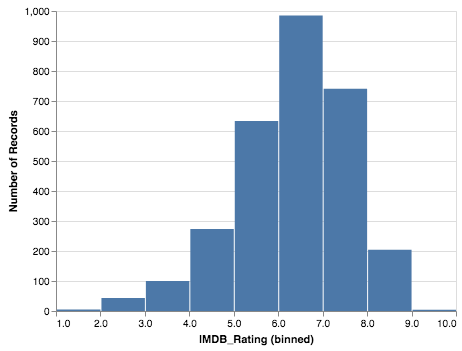

In [7]:
# Histogram
import altair as alt
from vega_datasets import data

movies = data.movies()

alt.Chart(movies).mark_bar().encode(
    alt.X("IMDB_Rating:Q", bin=True),
    y='count()',
    tooltip=['count()'],
)

In [8]:
movies.sample(3)

Creative_Type       Director          Distributor  IMDB_Rating  \
1561               Factual  Michel Gondry       Focus Features          NaN   
1286  Contemporary Fiction           None  Freestyle Releasing          NaN   
1408  Contemporary Fiction       Eli Roth            Lionsgate          5.4   

      IMDB_Votes MPAA_Rating  Major_Genre  Production_Budget Release_Date  \
1561         NaN           R  Documentary          3000000.0     3-Mar-06   
1286         NaN           R       Comedy          2800000.0    15-Sep-06   
1408     28417.0           R       Horror          1500000.0    12-Sep-03   

      Rotten_Tomatoes_Rating  Running_Time_min                     Source  \
1561                     NaN               NaN  Based on Real Life Events   
1286                     NaN               NaN        Original Screenplay   
1408                     NaN               NaN        Original Screenplay   

                             Title  US_DVD_Sales    US_Gross  Worldwide_Gross  
1561  Dave Chappelle's Block Party    18713941.0  11718595.0       12051924.0  
1286     Artie Lange's Beer League           NaN    475000.0         475000.0  
1408                   Cabin Fever           NaN  21158188.0       30553394.0

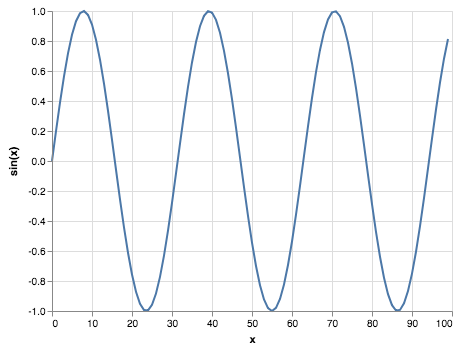

In [9]:
# Line Chart
import altair as alt
import numpy as np
import pandas as pd

x = np.arange(100)
data = pd.DataFrame({'x': x,
                     'sin(x)': np.sin(x / 5)})

alt.Chart(data).mark_line().encode(
    x='x',
    y='sin(x)'
)

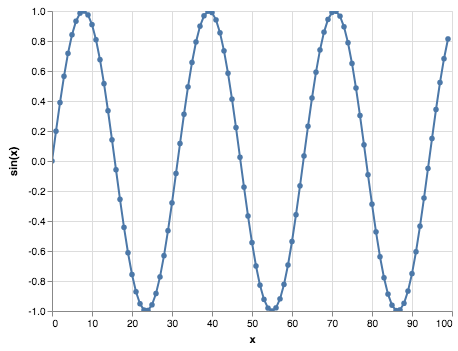

In [10]:
# Line Chart with markers
import altair as alt
import numpy as np
import pandas as pd

x = np.arange(100)
data = pd.DataFrame({'x': x,
                     'sin(x)': np.sin(x / 5)})

alt.Chart(data).mark_line(point=True).encode(
    x='x',
    y='sin(x)'
).interactive()

In [11]:
data.head(3)

sin(x)  x
0  0.000000  0
1  0.198669  1
2  0.389418  2

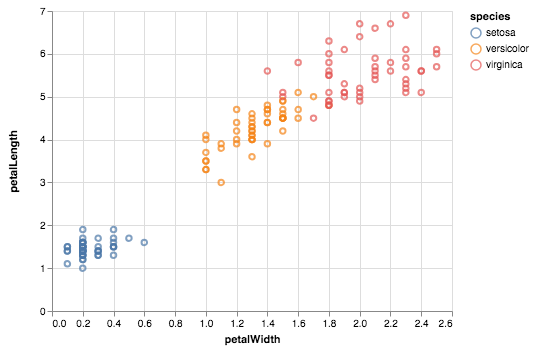

In [12]:
# Scatter Plot
import altair as alt
from vega_datasets import data

iris = data.iris()

alt.Chart(iris).mark_point().encode( # mark_circle
    x='petalWidth',
    y='petalLength',
    color='species',
    tooltip=['species', 'petalLength', 'petalWidth']
).interactive()

In [13]:
iris.sample(3)

petalLength  petalWidth  sepalLength  sepalWidth     species
55          4.5         1.3          5.7         2.8  versicolor
54          4.6         1.5          6.5         2.8  versicolor
81          3.7         1.0          5.5         2.4  versicolor

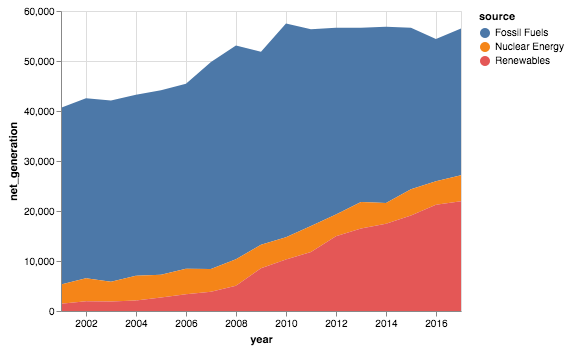

In [14]:
# Simple stacked area chart
import altair as alt
from vega_datasets import data

iowa = data.iowa_electricity()

alt.Chart(iowa).mark_area().encode(
    x="year:T",
    y="net_generation:Q",
    color="source:N"
)

In [15]:
iowa.sample(3)

year          source  net_generation
42 2009-01-01      Renewables            8560
7  2008-01-01    Fossil Fuels           42734
18 2002-01-01  Nuclear Energy            4574

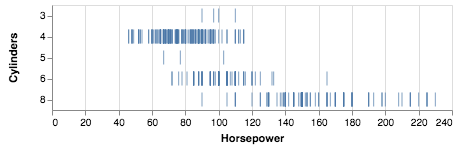

In [16]:
# Strip Plot

import altair as alt
from vega_datasets import data

source = data.cars()

alt.Chart(source).mark_tick().encode(
    x='Horsepower:Q',
    y='Cylinders:O',
    tooltip=['Name', 'Horsepower', 'Cylinders']
)

In [17]:
source.sample(3)

Acceleration  Cylinders  Displacement  Horsepower  Miles_per_Gallon  \
292          15.4          8         305.0       130.0              17.0   
274          14.2          4         134.0        95.0              27.5   
389          14.5          4         107.0        75.0              36.0   

                          Name Origin  Weight_in_lbs       Year  
292  chevrolet caprice classic    USA           3840 1979-01-01  
274              toyota corona  Japan           2560 1978-01-01  
389      honda Accelerationord  Japan           2205 1982-01-01

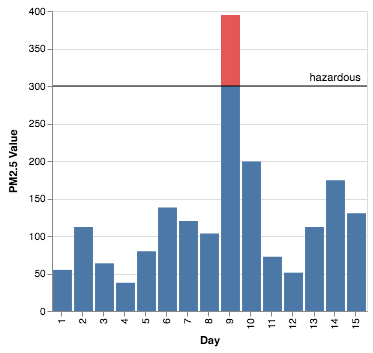

In [18]:
# Bar chart with highlights

import altair as alt
import pandas as pd

data = pd.DataFrame({"Day": range(1, 16),
                     "Value": [54.8, 112.1, 63.6, 37.6, 79.7, 137.9, 120.1, 103.3,
                               394.8, 199.5, 72.3, 51.1, 112.0, 174.5, 130.5]})

data2 = pd.DataFrame([{"ThresholdValue": 300, "Threshold": "hazardous"}])

bar1 = alt.Chart(data).mark_bar().encode(
    x='Day:O',
    y='Value:Q',
    tooltip=['Value']
)

bar2 = alt.Chart(data).mark_bar(color="#e45755").encode(
    x='Day:O',
    y='baseline:Q',
    y2='Value:Q',
    tooltip=['Value']
).transform_filter(
    "datum.Value >= 300"
).transform_calculate(
    "baseline", "300"
)

rule = alt.Chart(data2).mark_rule().encode(
    y='ThresholdValue:Q'
)

text = alt.Chart(data2).mark_text(
    align='left', dx=100, dy=-5
).encode(
    alt.Y('ThresholdValue:Q', axis=alt.Axis(title='PM2.5 Value')),
    text=alt.value('hazardous')
)

bar1 + text + bar2 + rule

In [19]:
data.sample(3)

Day  Value
9    10  199.5
1     2  112.1
14   15  130.5

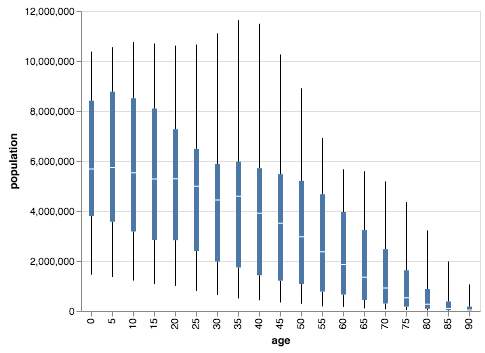

In [20]:
# Box Plot with Min/Max Whiskers
import altair as alt
from vega_datasets import data

population = pd.read_json(data.population.url)

# Define aggregate fields
lower_box = 'q1(people):Q'
lower_whisker = 'min(people):Q'
upper_box = 'q3(people):Q'
upper_whisker = 'max(people):Q'

# Compose each layer individually
lower_plot = alt.Chart(population).mark_rule().encode(
    y=alt.Y(lower_whisker, axis=alt.Axis(title="population")),
    y2=lower_box,
    x='age:O'
)

middle_plot = alt.Chart(population).mark_bar(size=5.0).encode(
    y=lower_box,
    y2=upper_box,
    x='age:O'
)

upper_plot = alt.Chart(population).mark_rule().encode(
    y=upper_whisker,
    y2=upper_box,
    x='age:O'
)

middle_tick = alt.Chart(population).mark_tick(
    color='white',
    size=20.0
).encode(
    y='median(people):Q',
    x='age:O'
)

lower_plot + middle_plot + upper_plot + middle_tick

In [21]:
population.sample(3)

age    people  sex  year
536   10  10563233    1  2000
564   80   1902638    1  2000
439   50   5783817    2  1970

In [46]:
# ## Calculating Percentage of Total

# import altair as alt
# from altair.expr import datum
# import pandas as pd

# activities = pd.DataFrame({'Activity': ['Sleeping', 'Eating', 'TV', 'Work', 'Exercise'],
#                            'Time': [8, 2, 4, 8, 2]})

# alt.Chart(activities).mark_bar().encode(
#     alt.X('PercentOfTotal:Q', axis=alt.Axis(format='.0%')),
#     y='Activity:N'
# ).transform_window(
#     TotalTime='sum(Time)',
#     frame=[None, None]
# ).transform_calculate(
#     PercentOfTotal="datum.Time / datum.TotalTime"
# )

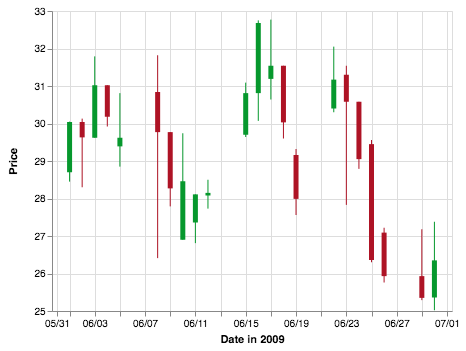

In [23]:
# Candlestick Chart

import altair as alt
import pandas as pd

df = pd.DataFrame(
[
      {
        "date": "2009-06-01",
        "open": 28.7,
        "high": 30.05,
        "low": 28.45,
        "close": 30.04,
        "signal": "short",
        "ret": -4.89396411092985
      },
      {
        "date": "2009-06-02",
        "open": 30.04,
        "high": 30.13,
        "low": 28.3,
        "close": 29.63,
        "signal": "short",
        "ret": -0.322580645161295
      },
      {
        "date": "2009-06-03",
        "open": 29.62,
        "high": 31.79,
        "low": 29.62,
        "close": 31.02,
        "signal": "short",
        "ret": 3.68663594470045
      },
      {
        "date": "2009-06-04",
        "open": 31.02,
        "high": 31.02,
        "low": 29.92,
        "close": 30.18,
        "signal": "short",
        "ret": 4.51010886469673
      },
      {
        "date": "2009-06-05",
        "open": 29.39,
        "high": 30.81,
        "low": 28.85,
        "close": 29.62,
        "signal": "short",
        "ret": 6.08424336973478
      },
      {
        "date": "2009-06-08",
        "open": 30.84,
        "high": 31.82,
        "low": 26.41,
        "close": 29.77,
        "signal": "short",
        "ret": 1.2539184952978
      },
      {
        "date": "2009-06-09",
        "open": 29.77,
        "high": 29.77,
        "low": 27.79,
        "close": 28.27,
        "signal": "short",
        "ret": -5.02431118314424
      },
      {
        "date": "2009-06-10",
        "open": 26.9,
        "high": 29.74,
        "low": 26.9,
        "close": 28.46,
        "signal": "short",
        "ret": -5.46623794212217
      },
      {
        "date": "2009-06-11",
        "open": 27.36,
        "high": 28.11,
        "low": 26.81,
        "close": 28.11,
        "signal": "short",
        "ret": -8.3743842364532
      },
      {
        "date": "2009-06-12",
        "open": 28.08,
        "high": 28.5,
        "low": 27.73,
        "close": 28.15,
        "signal": "short",
        "ret": -5.52763819095477
      },
      {
        "date": "2009-06-15",
        "open": 29.7,
        "high": 31.09,
        "low": 29.64,
        "close": 30.81,
        "signal": "long",
        "ret": 3.4920634920635
      },
      {
        "date": "2009-06-16",
        "open": 30.81,
        "high": 32.75,
        "low": 30.07,
        "close": 32.68,
        "signal": "short",
        "ret": 0.155038759689914
      },
      {
        "date": "2009-06-17",
        "open": 31.19,
        "high": 32.77,
        "low": 30.64,
        "close": 31.54,
        "signal": "short",
        "ret": 5.82822085889571
      },
      {
        "date": "2009-06-18",
        "open": 31.54,
        "high": 31.54,
        "low": 29.6,
        "close": 30.03,
        "signal": "short",
        "ret": 8.17610062893082
      },
      {
        "date": "2009-06-19",
        "open": 29.16,
        "high": 29.32,
        "low": 27.56,
        "close": 27.99,
        "signal": "short",
        "ret": 8.59872611464968
      },
      {
        "date": "2009-06-22",
        "open": 30.4,
        "high": 32.05,
        "low": 30.3,
        "close": 31.17,
        "signal": "short",
        "ret": 15.4907975460123
      },
      {
        "date": "2009-06-23",
        "open": 31.3,
        "high": 31.54,
        "low": 27.83,
        "close": 30.58,
        "signal": "short",
        "ret": 11.7370892018779
      },
      {
        "date": "2009-06-24",
        "open": 30.58,
        "high": 30.58,
        "low": 28.79,
        "close": 29.05,
        "signal": "long",
        "ret": -10.4234527687296
      },
      {
        "date": "2009-06-25",
        "open": 29.45,
        "high": 29.56,
        "low": 26.3,
        "close": 26.36,
        "signal": "long",
        "ret": 0
      },
      {
        "date": "2009-06-26",
        "open": 27.09,
        "high": 27.22,
        "low": 25.76,
        "close": 25.93,
        "signal": "long",
        "ret": 0
      },
      {
        "date": "2009-06-29",
        "open": 25.93,
        "high": 27.18,
        "low": 25.29,
        "close": 25.35,
        "signal": "long",
        "ret": 5.26315789473684
      },
      {
        "date": "2009-06-30",
        "open": 25.36,
        "high": 27.38,
        "low": 25.02,
        "close": 26.35,
        "signal": "long",
        "ret": 6.73758865248228
      }
    ]
)
open_close_color = alt.condition("datum.open < datum.close",
                                 alt.value("#06982d"),
                                 alt.value("#ae1325"))

rule = alt.Chart(df).mark_rule().encode(
    alt.X(
        'yearmonthdate(date):T',
        scale=alt.Scale(domain=[{"month": 5, "date": 31, "year": 2009},
                                {"month": 7, "date": 1, "year": 2009}]),
        axis=alt.Axis(format='%m/%d', title='Date in 2009')
    ),
    alt.Y(
        'low',
        scale=alt.Scale(zero=False),
        axis=alt.Axis(title='Price')
    ),
    alt.Y2('high'),
    color=open_close_color
)

bar = alt.Chart(df).mark_bar().encode(
    x='yearmonthdate(date):T',
    y='open',
    y2='close',
    color=open_close_color,
    tooltip=['open','close','high','low']
)

(rule + bar).interactive()

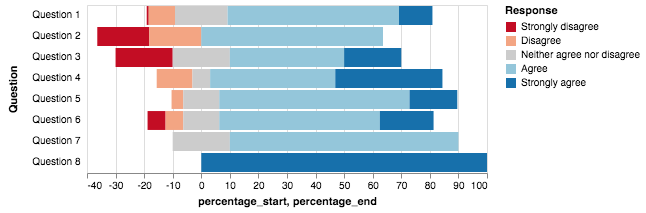

In [24]:
# Diverging Stacked Bar Chart
import altair as alt

data =     [
      {
        "question": "Question 1",
        "type": "Strongly disagree",
        "value": 24,
        "percentage": 0.7,
        "percentage_start": -19.1,
        "percentage_end": -18.4
      },
      {
        "question": "Question 1",
        "type": "Disagree",
        "value": 294,
        "percentage": 9.1,
        "percentage_start": -18.4,
        "percentage_end": -9.2
      },
      {
        "question": "Question 1",
        "type": "Neither agree nor disagree",
        "value": 594,
        "percentage": 18.5,
        "percentage_start": -9.2,
        "percentage_end": 9.2
      },
      {
        "question": "Question 1",
        "type": "Agree",
        "value": 1927,
        "percentage": 59.9,
        "percentage_start": 9.2,
        "percentage_end": 69.2
      },
      {
        "question": "Question 1",
        "type": "Strongly agree",
        "value": 376,
        "percentage": 11.7,
        "percentage_start": 69.2,
        "percentage_end": 80.9
      },

      {
        "question": "Question 2",
        "type": "Strongly disagree",
        "value": 2,
        "percentage": 18.2,
        "percentage_start": -36.4,
        "percentage_end": -18.2
      },
      {
        "question": "Question 2",
        "type": "Disagree",
        "value": 2,
        "percentage": 18.2,
        "percentage_start": -18.2,
        "percentage_end": 0
      },
      {
        "question": "Question 2",
        "type": "Neither agree nor disagree",
        "value": 0,
        "percentage": 0,
        "percentage_start": 0,
        "percentage_end": 0
      },
      {
        "question": "Question 2",
        "type": "Agree",
        "value": 7,
        "percentage": 63.6,
        "percentage_start": 0,
        "percentage_end": 63.6
      },
      {
        "question": "Question 2",
        "type": "Strongly agree",
        "value": 11,
        "percentage": 0,
        "percentage_start": 63.6,
        "percentage_end": 63.6
      },

      {
        "question": "Question 3",
        "type": "Strongly disagree",
        "value": 2,
        "percentage": 20,
        "percentage_start": -30,
        "percentage_end": -10
      },
      {
        "question": "Question 3",
        "type": "Disagree",
        "value": 0,
        "percentage": 0,
        "percentage_start": -10,
        "percentage_end": -10
      },
      {
        "question": "Question 3",
        "type": "Neither agree nor disagree",
        "value": 2,
        "percentage": 20,
        "percentage_start": -10,
        "percentage_end": 10
      },
      {
        "question": "Question 3",
        "type": "Agree",
        "value": 4,
        "percentage": 40,
        "percentage_start": 10,
        "percentage_end": 50
      },
      {
        "question": "Question 3",
        "type": "Strongly agree",
        "value": 2,
        "percentage": 20,
        "percentage_start": 50,
        "percentage_end": 70
      },

      {
        "question": "Question 4",
        "type": "Strongly disagree",
        "value": 0,
        "percentage": 0,
        "percentage_start": -15.6,
        "percentage_end": -15.6
      },
      {
        "question": "Question 4",
        "type": "Disagree",
        "value": 2,
        "percentage": 12.5,
        "percentage_start": -15.6,
        "percentage_end": -3.1
      },
      {
        "question": "Question 4",
        "type": "Neither agree nor disagree",
        "value": 1,
        "percentage": 6.3,
        "percentage_start": -3.1,
        "percentage_end": 3.1
      },
      {
        "question": "Question 4",
        "type": "Agree",
        "value": 7,
        "percentage": 43.8,
        "percentage_start": 3.1,
        "percentage_end": 46.9
      },
      {
        "question": "Question 4",
        "type": "Strongly agree",
        "value": 6,
        "percentage": 37.5,
        "percentage_start": 46.9,
        "percentage_end": 84.4
      },

      {
        "question": "Question 5",
        "type": "Strongly disagree",
        "value": 0,
        "percentage": 0,
        "percentage_start": -10.4,
        "percentage_end": -10.4
      },
      {
        "question": "Question 5",
        "type": "Disagree",
        "value": 1,
        "percentage": 4.2,
        "percentage_start": -10.4,
        "percentage_end": -6.3
      },
      {
        "question": "Question 5",
        "type": "Neither agree nor disagree",
        "value": 3,
        "percentage": 12.5,
        "percentage_start": -6.3,
        "percentage_end": 6.3
      },
      {
        "question": "Question 5",
        "type": "Agree",
        "value": 16,
        "percentage": 66.7,
        "percentage_start": 6.3,
        "percentage_end": 72.9
      },
      {
        "question": "Question 5",
        "type": "Strongly agree",
        "value": 4,
        "percentage": 16.7,
        "percentage_start": 72.9,
        "percentage_end": 89.6
      },

      {
        "question": "Question 6",
        "type": "Strongly disagree",
        "value": 1,
        "percentage": 6.3,
        "percentage_start": -18.8,
        "percentage_end": -12.5
      },
      {
        "question": "Question 6",
        "type": "Disagree",
        "value": 1,
        "percentage": 6.3,
        "percentage_start": -12.5,
        "percentage_end": -6.3
      },
      {
        "question": "Question 6",
        "type": "Neither agree nor disagree",
        "value": 2,
        "percentage": 12.5,
        "percentage_start": -6.3,
        "percentage_end": 6.3
      },
      {
        "question": "Question 6",
        "type": "Agree",
        "value": 9,
        "percentage": 56.3,
        "percentage_start": 6.3,
        "percentage_end": 62.5
      },
      {
        "question": "Question 6",
        "type": "Strongly agree",
        "value": 3,
        "percentage": 18.8,
        "percentage_start": 62.5,
        "percentage_end": 81.3
      },

      {
        "question": "Question 7",
        "type": "Strongly disagree",
        "value": 0,
        "percentage": 0,
        "percentage_start": -10,
        "percentage_end": -10
      },
      {
        "question": "Question 7",
        "type": "Disagree",
        "value": 0,
        "percentage": 0,
        "percentage_start": -10,
        "percentage_end": -10
      },
      {
        "question": "Question 7",
        "type": "Neither agree nor disagree",
        "value": 1,
        "percentage": 20,
        "percentage_start": -10,
        "percentage_end": 10
      },
      {
        "question": "Question 7",
        "type": "Agree",
        "value": 4,
        "percentage": 80,
        "percentage_start": 10,
        "percentage_end": 90
      },
      {
        "question": "Question 7",
        "type": "Strongly agree",
        "value": 0,
        "percentage": 0,
        "percentage_start": 90,
        "percentage_end": 90
      },

      {
        "question": "Question 8",
        "type": "Strongly disagree",
        "value": 0,
        "percentage": 0,
        "percentage_start": 0,
        "percentage_end": 0
      },
      {
        "question": "Question 8",
        "type": "Disagree",
        "value": 0,
        "percentage": 0,
        "percentage_start": 0,
        "percentage_end": 0
      },
      {
        "question": "Question 8",
        "type": "Neither agree nor disagree",
        "value": 0,
        "percentage": 0,
        "percentage_start": 0,
        "percentage_end": 0
      },
      {
        "question": "Question 8",
        "type": "Agree",
        "value": 0,
        "percentage": 0,
        "percentage_start": 0,
        "percentage_end": 0
      },
      {
        "question": "Question 8",
        "type": "Strongly agree",
        "value": 2,
        "percentage": 100,
        "percentage_start": 0,
        "percentage_end": 100
      }
    ]


color_scale = alt.Scale(
            domain=["Strongly disagree",
            "Disagree",
            "Neither agree nor disagree",
            "Agree",
            "Strongly agree"],
            range=["#c30d24", "#f3a583", "#cccccc", "#94c6da", "#1770ab"]
        )

y_axis = alt.Axis(title='Question',
                  offset=5,
                  ticks=False,
                  minExtent=60,
                  domain=False)

source = alt.pd.DataFrame(data)

alt.Chart(source).mark_bar().encode(
    x='percentage_start:Q',
    x2='percentage_end:Q',
    y=alt.Y('question:N', axis=y_axis),
    tooltip=['percentage_start:Q','percentage_end:Q'],
    color=alt.Color(
        'type:N',
        legend=alt.Legend( title='Response'),
        scale=color_scale,
    )
).interactive()

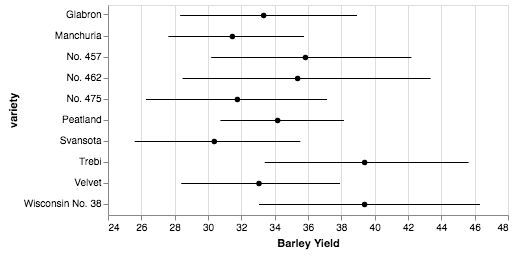

In [41]:
# Error Bars showing Confidence Interval
import altair as alt
from vega_datasets import data

barley = data.barley()

points = alt.Chart(barley).mark_point(filled=True).encode(
    alt.X(
        'mean(yield)',
        scale=alt.Scale(zero=False),
        axis=alt.Axis(title='Barley Yield')
    ),
    y='variety',
    color=alt.value('black')
)

error_bars = alt.Chart(barley).mark_rule().encode(
    x='ci0(yield)',
    x2='ci1(yield)',
    y='variety',
    tooltip=[alt.Tooltip('ci0(yield)', title='Lower CI'), alt.Tooltip('ci1(yield)', title='Upper CI'), alt.Tooltip('mean(yield)', title='Mean')]
)

points + error_bars

In [27]:
barley.sample(3)

site           variety  year    yield
114  University Farm  Wisconsin No. 38  1932  38.0000
85            Waseca             Trebi  1932  49.2333
73            Waseca          Svansota  1932  38.5000

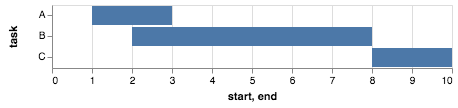

In [47]:
# Gantt Chart

import altair as alt
import pandas as pd

data = pd.DataFrame([
    {"task": "A", "start": 1, "end": 3},
    {"task": "B", "start": 2, "end": 8},
    {"task": "C", "start": 8, "end": 10}
])

alt.Chart(data).mark_bar().encode(
    x='start',
    x2='end',
    y='task',
    tooltip=['start','end']
).interactive()

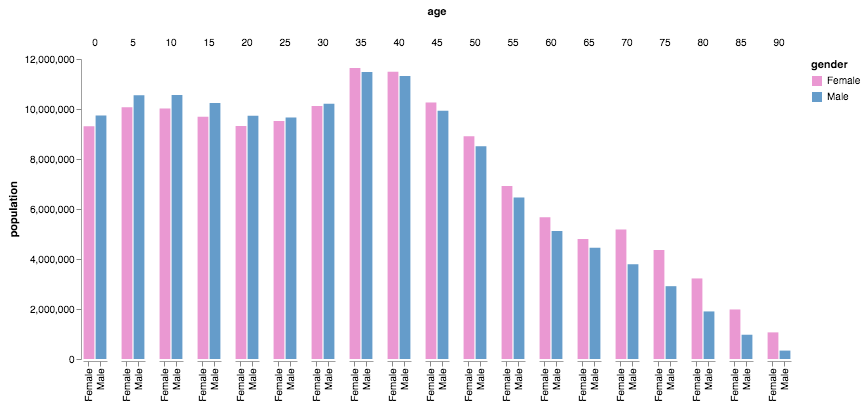

In [50]:
# Grouped Bar Chart

import altair as alt
from altair.expr import datum, if_
from vega_datasets import data

source = data.population.url

alt.Chart(source).mark_bar(stroke='transparent').encode(
    alt.X('gender:N', scale=alt.Scale(rangeStep=12), axis=alt.Axis(title='')),
    alt.Y('sum(people):Q', axis=alt.Axis(title='population', grid=False)),
    color=alt.Color('gender:N', scale=alt.Scale(range=["#EA98D2", "#659CCA"])),
    column='age:O',
    tooltip=[alt.Tooltip('sum(people):Q', title='Population'), 'age:O', 'gender:N']
).configure_view(
    stroke='transparent'
).configure_axis(
    domainWidth=0.8
).transform_filter(
    datum.year == 2000
).transform_calculate(
    'gender', if_(datum.sex == 2, 'Female', 'Male')
)

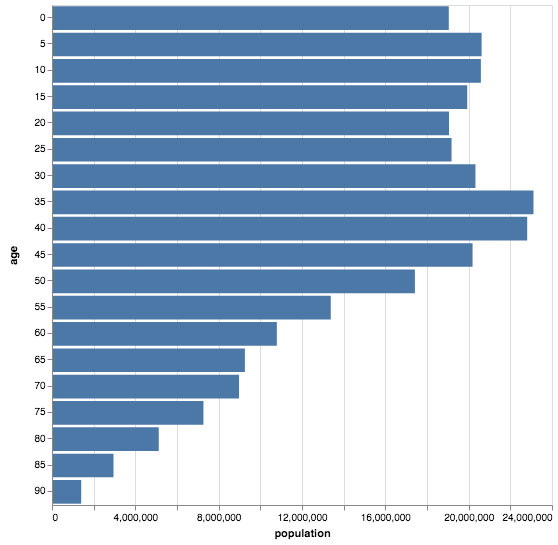

In [58]:
# Horizontal Aggregate Bar Chart

import altair as alt
from altair.expr import datum

from vega_datasets import data
pop = data.population.url

alt.Chart(pop).mark_bar().encode(
    x=alt.X('sum(people):Q', axis=alt.Axis(title='population')),
    y='age:O',
    tooltip=['sum(people):Q']
).properties(
    height=500,
    width=500
).transform_filter(
    datum.year == 2000
)

In [57]:
pd.read_json(pop).sample(3)

age   people  sex  year
389   20  5513495    2  1960
54    40   699434    1  1860
10    25   862547    1  1850

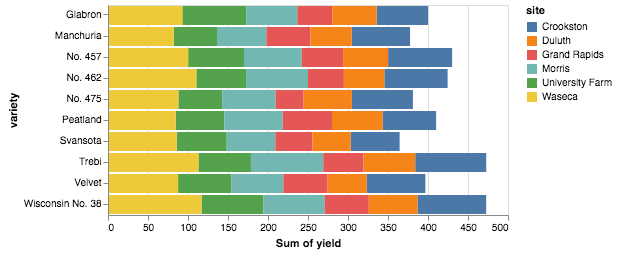

In [60]:
# Horizontal Stacked Bar Chart

import altair as alt
from vega_datasets import data

barley = data.barley()

alt.Chart(barley).mark_bar().encode(
    x='sum(yield)',
    y='variety',
    color='site',
    tooltip=[alt.Tooltip('sum(yield)',title='Total yield'), alt.Tooltip('variety', title='Variety'), alt.Tooltip('site', title='Site')]
)#.interactive()

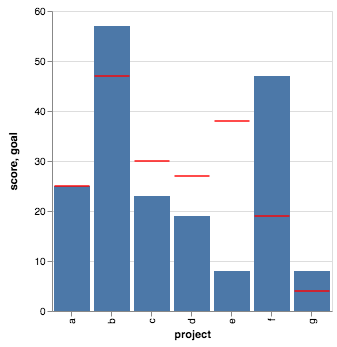

In [63]:
# LayerChart with Bar and Tick

import altair as alt
import pandas as pd

data = pd.DataFrame({
    'project': ['a', 'b', 'c', 'd', 'e', 'f', 'g'],
    'score': [25, 57, 23, 19, 8, 47, 8],
    'goal': [25, 47, 30, 27, 38, 19, 4]}
)

a = alt.Chart().mark_bar().encode(
    x='project',
    y='score',
    tooltip=['project', 'score', 'goal']
)

b = alt.Chart().mark_tick(
    color='red',
).encode(
    x='project',
    y='goal',
    tooltip=['project', 'score', 'goal']
)

alt.layer(a, b).properties(
    data=data
).configure_tick(
    thickness=2,
    bandSize=35  # controls the width of the tick
).configure_scale(
    rangeStep=40  # controls the width of the bar
)

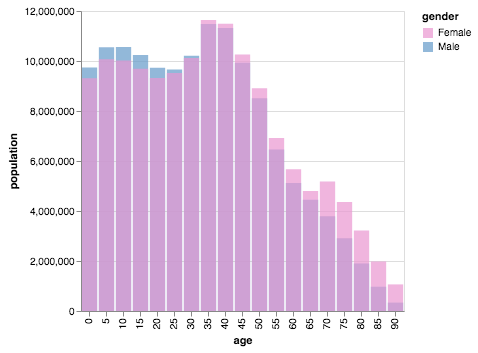

In [64]:
# Layered Bar Chart

import altair as alt
from altair.expr import datum, if_
from vega_datasets import data

source = data.population.url

alt.Chart(source).mark_bar(opacity=0.7).encode(
    alt.X('age:O', scale=alt.Scale(rangeStep=17)),
    alt.Y('sum(people):Q', axis=alt.Axis(title='population'), stack=None),
    alt.Color('gender:N', scale=alt.Scale(range=["#EA98D2", "#659CCA"])),
    tooltip=[alt.Tooltip('sum(people):Q', title='Population'), alt.Tooltip('age:O', title='Age'), 'gender:N']
).transform_filter(
    datum.year == 2000
).transform_calculate(
    "gender", if_(datum.sex == 2, 'Female', 'Male')
)

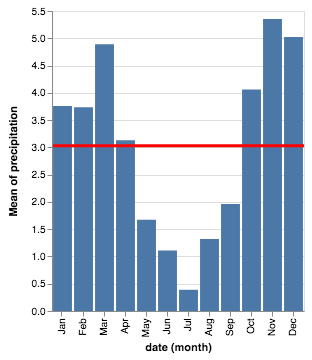

In [73]:
# Layered Bar Chart with Line as Mean

import altair as alt
from vega_datasets import data

source = data.seattle_weather()

bar = alt.Chart(source).mark_bar().encode(
    x='month(date):O',
    y='mean(precipitation):Q',
    tooltip=['month(date)','mean(precipitation)']
)

rule = alt.Chart(source).mark_rule(color='red').encode(
    y='mean(precipitation)',
    size=alt.value(3)
)

bar + rule

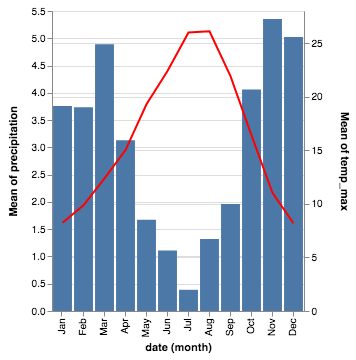

In [78]:
# Layered Plot with Dual-Axis

import altair as alt
from vega_datasets import data

source = data.seattle_weather()

base = alt.Chart(source).encode(
    alt.X('month(date):O',
        axis=alt.Axis(format='%b'),
        scale=alt.Scale(zero=False)
    )
)

bar = base.mark_bar().encode(
    y='mean(precipitation)',
    tooltip=['mean(precipitation)','mean(temp_max)']
)


line =  base.mark_line(color='red').encode(
    y='mean(temp_max)',
#     tooltip=['mean(temp_max)'],
)

alt.layer(
    bar,
    line
).resolve_scale(
    y='independent'
)

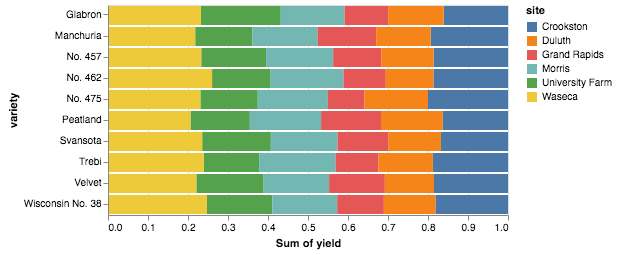

In [79]:
# Normalized Stacked Bar Chart

import altair as alt
from vega_datasets import data

barley = data.barley()

alt.Chart(barley).mark_bar().encode(
    x=alt.X('sum(yield)', stack="normalize"),
    y='variety',
    color='site',
    tooltip=[alt.Tooltip('sum(yield)', title='Total yield'), 'variety', 'site']
)

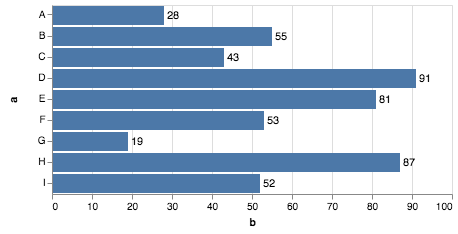

In [80]:
# Simple Bar Chart with Labels

import altair as alt
import pandas as pd

data = pd.DataFrame({
    'a': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I'],
    'b': [28, 55, 43, 91, 81, 53, 19, 87, 52]
})

bars = alt.Chart(data).mark_bar().encode(
    y='a',
    x='b'
)

text = bars.mark_text(
    align='left',
    baseline='middle',
    dx=3
).encode(
    text='b'
)

bars + text

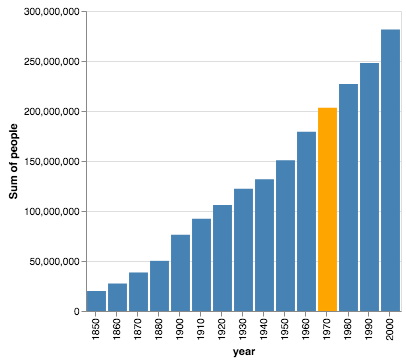

In [84]:
# Simple Highlighted Bar Chart

import altair as alt
from vega_datasets import data

population = data.population.url

alt.Chart(population).mark_bar().encode(
    x="year:O",
    y="sum(people):Q",
    # The highlight will be set on the result of a conditional statement
    color=alt.condition(
        alt.datum.year == 1970,  # If the year is 1970 this test returns True,
        alt.value('orange'),     # which sets the bar orange.
        alt.value('steelblue')   # And if it's not true it sets the bar steelblue.
    )
)

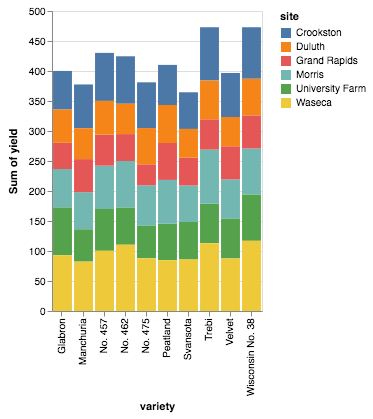

In [88]:
# Stacked Bar Chart

import altair as alt
from vega_datasets import data

barley = data.barley()

alt.Chart(barley).mark_bar().encode(
    x='variety',
    y='sum(yield)',
    color='site',
    tooltip=[alt.Tooltip('sum(yield)', title='Total yield'), 'variety', 'site']
)

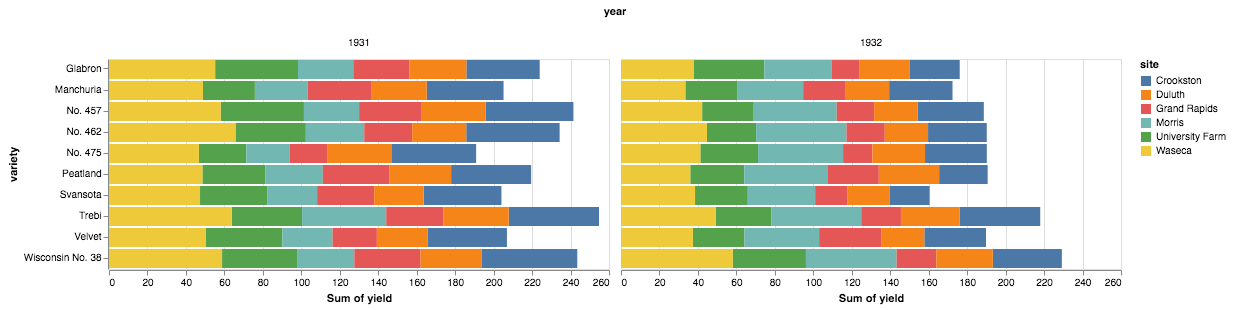

In [91]:
# Trellis Stacked Bar Chart

import altair as alt
from vega_datasets import data

barley = data.barley()

alt.Chart(barley).mark_bar().encode(
    column='year',
    x='sum(yield)',
    y='variety',
    color='site',
    tooltip=[alt.Tooltip('sum(yield)', title='Total yield'), 'variety', 'site']
).properties(
    width=500
)

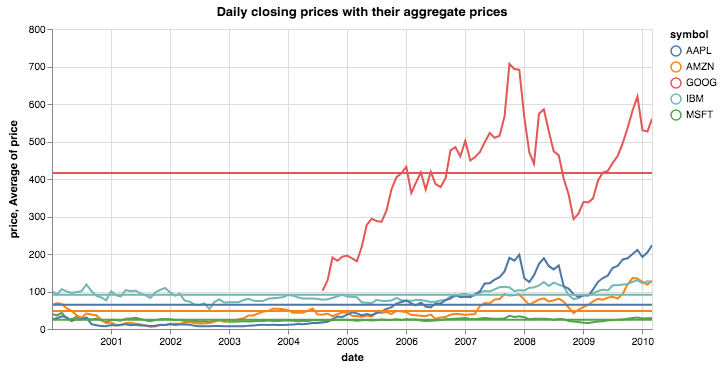

In [106]:
# Line Chart with Layered Aggregates

import altair as alt
from vega_datasets import data

stocks = data.stocks()

line = alt.Chart(stocks).mark_line().encode(
    x='date',
    y='price',
    color='symbol',
    tooltip=['symbol', 'price'] #, 'date(date):O'
).properties(
    width=600,
    title="Daily closing prices with their aggregate prices"
).interactive(bind_y=False)

rule = alt.Chart(stocks).mark_rule().encode(
    alt.Y('average(price)'),
    color='symbol',
    size=alt.value(2)
)

line + rule

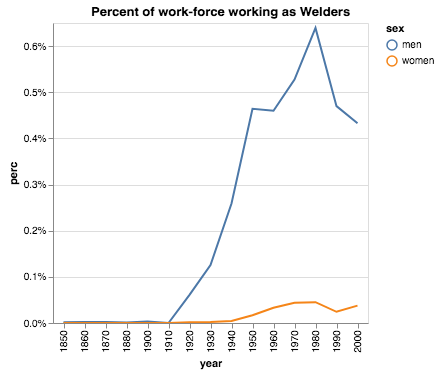

In [107]:
# Line Chart with Percent axis

import altair as alt
from altair.expr import datum
from vega_datasets import data

source = data.jobs.url

alt.Chart(source).mark_line().encode(
    alt.X('year:O'),
    alt.Y('perc:Q', axis=alt.Axis(format='%')),
    color='sex:N',
    tooltip=['year:O', 'perc:Q', 'sex:N']
).properties(
    title='Percent of work-force working as Welders'
).transform_filter(
    datum.job == 'Welder'
)

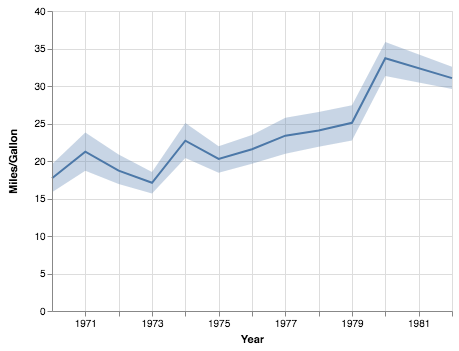

In [108]:
import altair as alt
from vega_datasets import data

cars = data.cars()

line = alt.Chart(cars).mark_line().encode(
    x='Year',
    y='mean(Miles_per_Gallon)'
)

confidence_interval = alt.Chart(cars).mark_area(opacity=0.3).encode(
    x='Year',
    y=alt.Y('ci0(Miles_per_Gallon)', axis=alt.Axis(title='Miles/Gallon')),
    y2='ci1(Miles_per_Gallon)'
)

confidence_interval + line

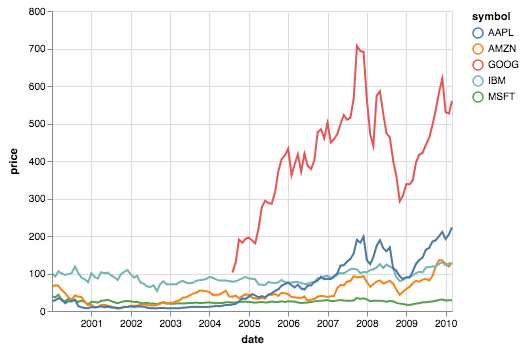

In [109]:
# Multi Series Line Chart

import altair as alt
from vega_datasets import data

stocks = data.stocks()

alt.Chart(stocks).mark_line().encode(
    x='date',
    y='price',
    color='symbol'
)

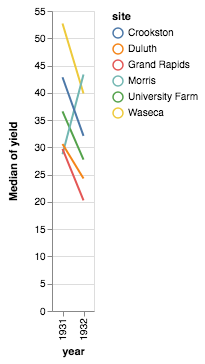

In [110]:
# Slope Graph

import altair as alt
from vega_datasets import data

source = data.barley()

# The year here is stored by pandas as an integer. When treating columns as dates,
# it is best to use either a string representation or a datetime representation.
source.year = source.year.astype(str)

alt.Chart(source).mark_line().encode(
    x='year',
    y='median(yield)',
    color='site'
)

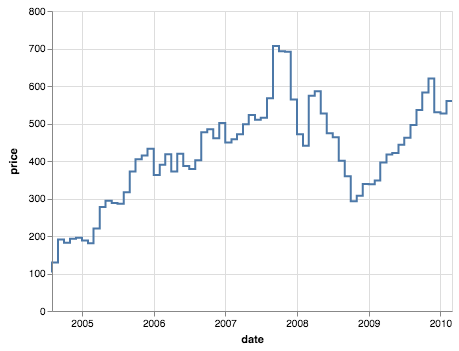

In [111]:
# Step Chart

import altair as alt
from altair.expr import datum
from vega_datasets import data

stocks = data.stocks()

alt.Chart(stocks).mark_line(interpolate='step-after').encode(
    x='date',
    y='price'
).transform_filter(
    datum.symbol == 'GOOG'
)


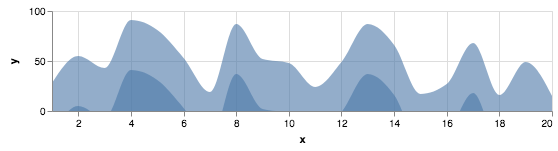

In [121]:
# Horizon Graph

import altair as alt
from altair.expr import datum
import pandas as pd

df = pd.DataFrame([
      {"x": 1,  "y": 28}, {"x": 2,  "y": 55},
      {"x": 3,  "y": 43}, {"x": 4,  "y": 91},
      {"x": 5,  "y": 81}, {"x": 6,  "y": 53},
      {"x": 7,  "y": 19}, {"x": 8,  "y": 87},
      {"x": 9,  "y": 52}, {"x": 10, "y": 48},
      {"x": 11, "y": 24}, {"x": 12, "y": 49},
      {"x": 13, "y": 87}, {"x": 14, "y": 66},
      {"x": 15, "y": 17}, {"x": 16, "y": 27},
      {"x": 17, "y": 68}, {"x": 18, "y": 16},
      {"x": 19, "y": 49}, {"x": 20, "y": 15}
    ])

area1 = alt.Chart(df).mark_area(
    clip=True,
    interpolate='monotone'
).encode(
    alt.X('x', scale=alt.Scale(zero=False, nice=False)),
    alt.Y('y', scale=alt.Scale(domain=[0, 100]), axis=alt.Axis(title='y')),
    opacity=alt.value(0.6)
).properties(
    width=500,
    height=100
)

area2 = area1.encode(
    alt.Y('ny:Q', scale=alt.Scale(domain=[0, 100]))
).transform_calculate(
    "ny", datum.y - 50
)

area1 + area2


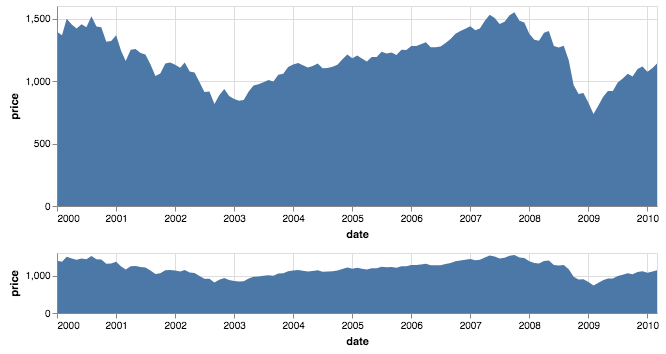

In [122]:
# Interval Selection Example

import altair as alt
from vega_datasets import data
sp500 = data.sp500.url

brush = alt.selection(type='interval', encodings=['x'])

upper = alt.Chart().mark_area().encode(
    alt.X('date:T', scale={'domain': brush.ref()}),
    y='price:Q'
).properties(
    width=600,
    height=200
)

lower = upper.properties(
    height=60
).add_selection(
    brush
)

alt.vconcat(upper, lower, data=sp500)

In [125]:
pd.read_csv(sp500).sample(3)

date    price
28  May 1 2002  1067.14
38  Mar 1 2003   848.18
88  May 1 2007  1530.62

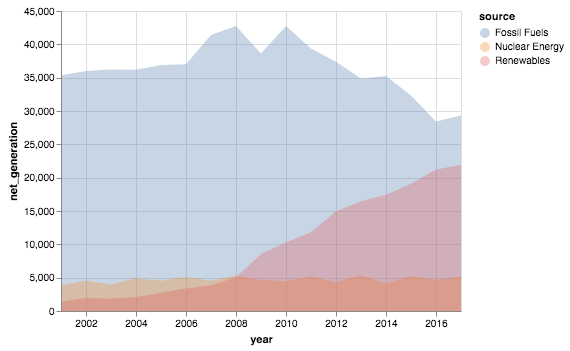

In [127]:
# Layered Area Chart

import altair as alt
from vega_datasets import data

iowa = data.iowa_electricity()

alt.Chart(iowa).mark_area(opacity=0.3).encode(
    x="year:T",
    y=alt.Y("net_generation:Q", stack=None),
    color="source:N"
)

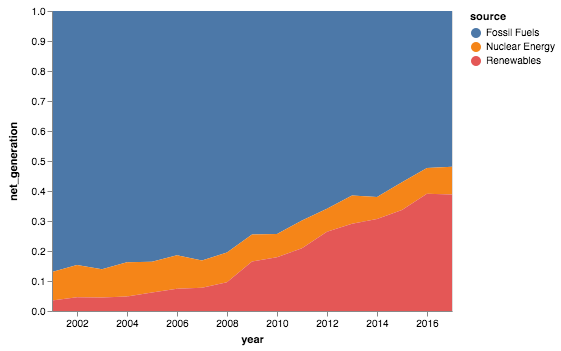

In [128]:
# Normalized Stacked Area Chart

import altair as alt
from vega_datasets import data

iowa = data.iowa_electricity()

alt.Chart(iowa).mark_area().encode(
    x="year:T",
    y=alt.Y("net_generation:Q", stack="normalize"),
    color="source:N"
)

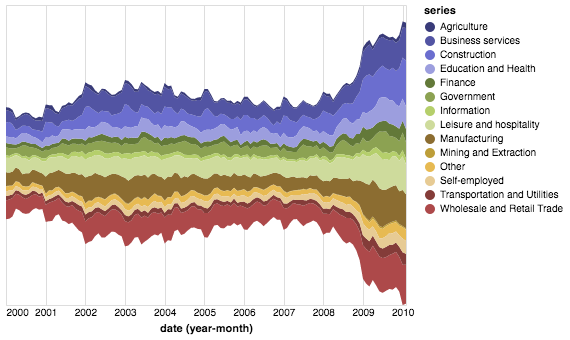

In [129]:
# Streamgraph

import altair as alt
from vega_datasets import data

source = data.unemployment_across_industries.url

alt.Chart(source).mark_area().encode(
    alt.X('yearmonth(date):T',
        axis=alt.Axis(format='%Y', domain=False, tickSize=0)
    ),
    alt.Y('sum(count):Q', stack='center', axis=None),
    alt.Color('series:N',
        scale=alt.Scale(scheme='category20b')
    )
).interactive()

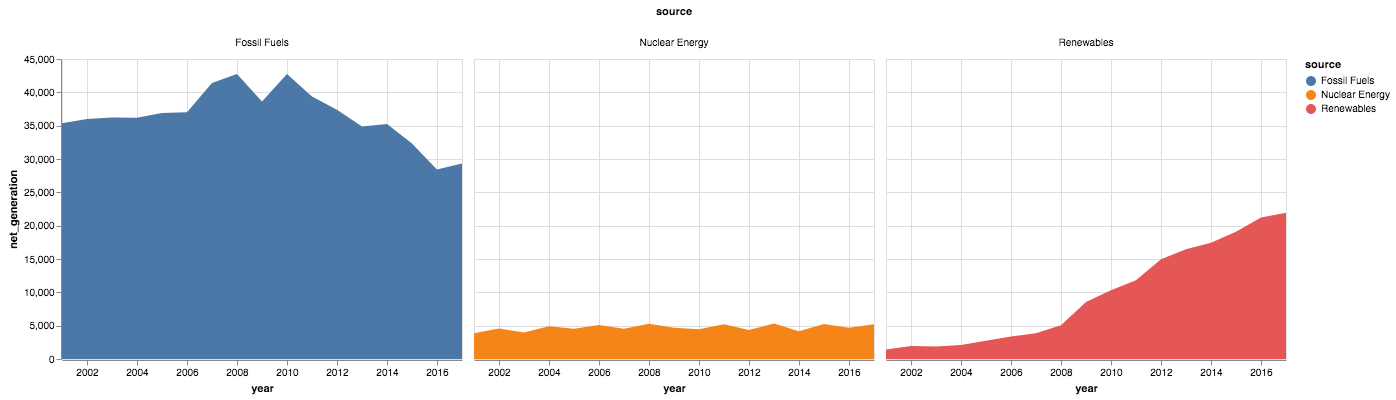

In [133]:
# Trellis Area Chart

import altair as alt
from vega_datasets import data

iowa = data.iowa_electricity()

alt.Chart(iowa).mark_area().encode(
    x="year:T",
    y="net_generation:Q",
    color="source:N",
    column="source:N" # row="source:N"
)

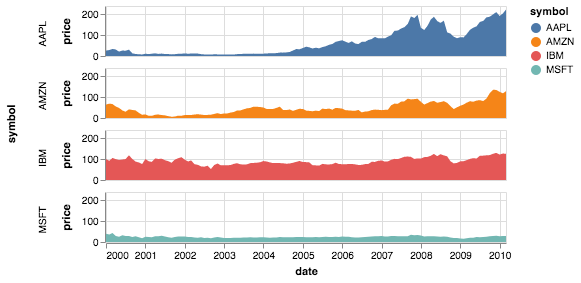

In [141]:
# Trellis Area Sort Chart

import altair as alt
from altair.expr import datum
from vega_datasets import data

stocks=data.stocks.url

alt.Chart(stocks).transform_filter(
    datum.symbol != 'GOOG'
).mark_area().encode(
    x='date:T',
    y='price:Q',
    color='symbol:N',
    row=alt.Row('symbol:N'#, sort=['MSFT', 'AAPL', 'IBM', 'AMZN']
    )
).properties(height=50, width=400)


In [140]:
pd.read_csv(stocks).sample(3)

symbol        date  price
148   AMZN  Feb 1 2002  14.10
159   AMZN  Jan 1 2003  21.85
168   AMZN  Oct 1 2003  54.43

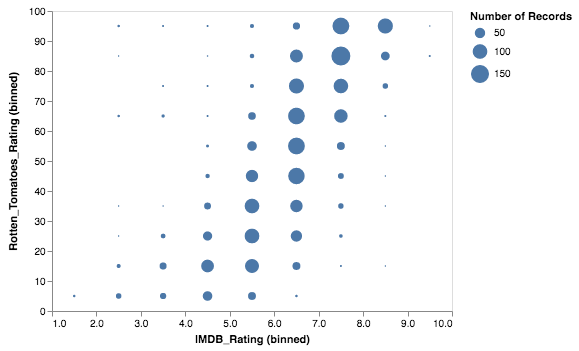

In [142]:
# Binned Scatterplot

import altair as alt
from vega_datasets import data

source = data.movies.url

alt.Chart(source).mark_circle().encode(
    alt.X('IMDB_Rating:Q', bin=True),
    alt.Y('Rotten_Tomatoes_Rating:Q', bin=True),
    size='count()'
)

In [144]:
pd.read_json(source).sample(3)

Creative_Type         Director        Distributor  IMDB_Rating  \
1848       Science Fiction  Roland Emmerich      Sony Pictures          4.8   
1692  Contemporary Fiction   Barry Levinson     Dreamworks SKG          4.6   
2942  Contemporary Fiction     Neal Brennan  Paramount Vantage          NaN   

      IMDB_Votes MPAA_Rating Major_Genre  Production_Budget Release_Date  \
1848     59455.0       PG-13      Action        125000000.0    19-May-98   
1692     15655.0       PG-13      Comedy         20000000.0    30-Apr-04   
2942         NaN           R      Comedy         10000000.0    14-Aug-09   

      Rotten_Tomatoes_Rating  Running_Time_min               Source  \
1848                    25.0             139.0               Remake   
1692                     7.0               NaN  Original Screenplay   
2942                    26.0              89.0  Original Screenplay   

                                Title  US_DVD_Sales     US_Gross  \
1848                         Godzilla           NaN  136314294.0   
1692                             Envy           NaN   13548322.0   
2942  The Goods: Live Hard, Sell Hard           NaN   15122676.0   

      Worldwide_Gross  
1848      376000000.0  
1692       14566246.0  
2942       15122676.0

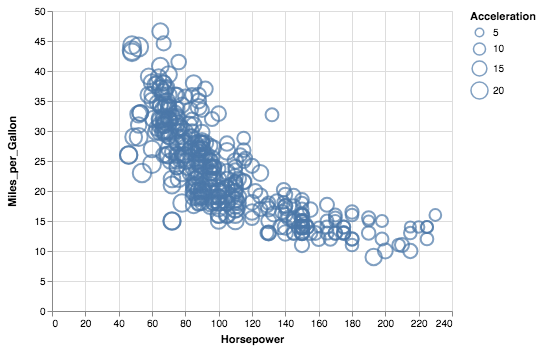

In [145]:
# Bubble Plot

import altair as alt
from vega_datasets import data

source = data.cars()

alt.Chart(source).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    size='Acceleration'
)

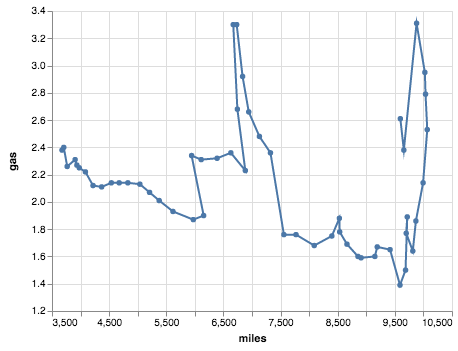

In [146]:
# Connected Scatterplot (Lines with Custom Paths)

import altair as alt
from vega_datasets import data

driving = data.driving()

alt.Chart(driving).mark_line(point=True).encode(
    alt.X('miles', scale=alt.Scale(zero=False)),
    alt.Y('gas', scale=alt.Scale(zero=False)),
    order='year'
)

In [148]:
driving.tail(3)

gas  miles    side  year
52  3.31   9880    left  2008
53  2.38   9657  bottom  2009
54  2.61   9596    left  2010

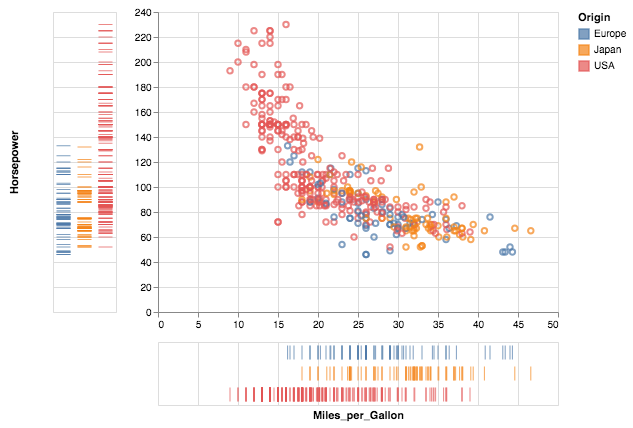

In [150]:
# Dot Dash Plot

import altair as alt
from vega_datasets import data

cars = data.cars()

brush = alt.selection(type='interval')

tick_axis = alt.Axis(labels=False, domain=False, ticks=False)
tick_axis_notitle = alt.Axis(labels=False, domain=False, ticks=False, title='')

points = alt.Chart(cars).mark_point().encode(
    x=alt.X('Miles_per_Gallon', axis=alt.Axis(title='')),
    y=alt.Y('Horsepower', axis=alt.Axis(title='')),
    color=alt.condition(brush, 'Origin', alt.value('grey'))
).add_selection(
    brush
)

x_ticks = alt.Chart(cars).mark_tick().encode(
    alt.X('Miles_per_Gallon', axis=tick_axis),
    alt.Y('Origin', axis=tick_axis_notitle),
    color=alt.condition(brush, 'Origin', alt.value('lightgrey'))
).add_selection(
    brush
)

y_ticks = alt.Chart(cars).mark_tick().encode(
    alt.X('Origin', axis=tick_axis_notitle),
    alt.Y('Horsepower', axis=tick_axis),
    color=alt.condition(brush, 'Origin', alt.value('lightgrey'))
).add_selection(
    brush
)

y_ticks | (points & x_ticks)

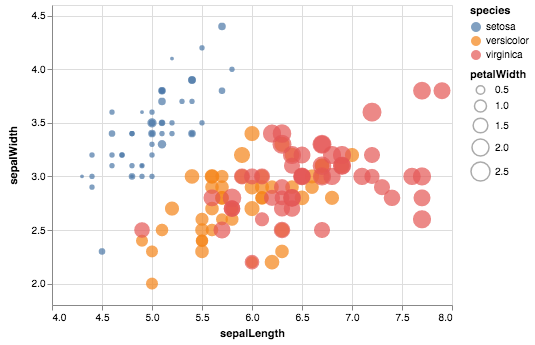

In [152]:
# Multifeature Scatter Plot

import altair as alt
from vega_datasets import data

iris = data.iris()

alt.Chart(iris).mark_circle().encode(
    alt.X('sepalLength', scale=alt.Scale(zero=False)),
    alt.Y('sepalWidth', scale=alt.Scale(zero=False, padding=1)),
    color='species',
    size='petalWidth',
    tooltip=['sepalLength','sepalWidth','petalWidth','species']
)

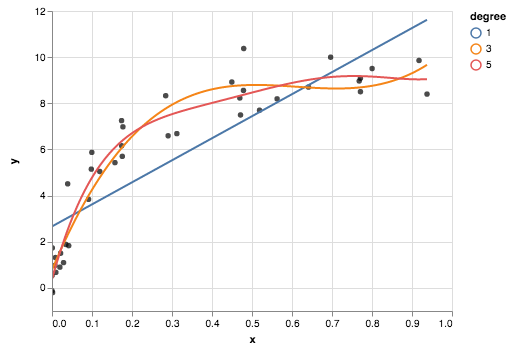

In [153]:
# Polynomial Fit Plot

import numpy as np
import pandas as pd
import altair as alt

# Generate some random data
rng = np.random.RandomState(1)
x = rng.rand(40) ** 2
y = 10 - 1. / (x + 0.1) + rng.randn(40)
df = pd.DataFrame({'x': x, 'y': y})

# Define the degree of the polynomial fit
degree_list = [1, 3, 5]

# Build a dataframe with the fitted data
poly_data = pd.DataFrame({'xfit': np.linspace(df['x'].min(), df['x'].max(), 500)})

for degree in degree_list:
    poly_data[str(degree)] = np.poly1d(np.polyfit(df['x'], df['y'], degree))(poly_data['xfit'])

# Tidy the dataframe so 'degree' is a variable
poly_data = pd.melt(poly_data,
                    id_vars=['xfit'],
                    value_vars=[str(deg) for deg in degree_list],
                    var_name='degree', value_name='yfit')

# Plot the data points on an interactive axis
points = alt.Chart(df).mark_circle(color='black').encode(
    x=alt.X('x', axis=alt.Axis(title='x')),
    y=alt.Y('y', axis=alt.Axis(title='y')),
).interactive()

# Plot the best fit polynomials
polynomial_fit = alt.Chart(poly_data).mark_line().encode(
    x='xfit',
    y='yfit',
    color='degree'
)

points + polynomial_fit